In [18]:
import numpy as np # tinh toan ma tran dai so
import pandas as pd # tien xử lý dữ liệu, được đọc vào input output
import matplotlib.pyplot as plt #nhiem vu la ve ra biểu đồ lượt đồ
import os # nhiệm vụ là đọc file , ghi file,ghi xuống ổ đĩa, thư mục,..
import cv2 # hàm xử lý thị giác máy tính
from sklearn.model_selection import train_test_split # chia ra 2 tập 1 huấn luyện 1 test
from keras.models import Sequential # khai báo tính tuần tự của mạng
from keras.layers import Dense, Dropout,Activation,Flatten #activation: là hàm kích hoạt, Dropout: chia nhỏ, Flatten: làm phẳng các hình 2D, 3D => tính toán các đặc trung qua cac tầng
from keras.layers import Convolution2D, MaxPooling2D #trích đặc trưng
import tensorflow as tf
from tensorflow.keras import utils #chứa hàm xử lý thông tin

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TGMT/BTN

Mounted at /content/drive
/content/drive/MyDrive/TGMT/BTN


In [19]:
import pickle
# Ham doc anh tu file .data
def load_data():
  file = open('data.data', 'rb')

  # Load thong tin trong file .data
  (pixels, label_ids) = pickle.load(file)

  file.close()

  print(pixels.shape)
  print(label_ids.shape)

  return pixels, label_ids

data, labels = load_data()

(5250, 128, 128, 3)
(5250, 46)


In [20]:
(trainX,testX,trainY,testY) = train_test_split(data,labels,test_size=0.2,random_state=42)

In [21]:
class_names = []

# Mở tệp labels.csv và đọc các mô tả lớp
with open('label.csv', 'r', encoding='utf-8') as file:
    lines = file.readlines()
    for line in lines:
        parts = line.split(';')
        class_name = parts[1].strip()  # Mô tả lớp là phần tử thứ hai sau dấu chấm phẩy
        class_names.append(class_name)

print(class_names)

['Không phải biển báo', 'Cấm đi ngược chiều', 'Cấm ô tô', 'Hạn chế tọng lượng xe', 'Hạn chế trọng lượng trên trục xe', 'Hạn chế chiều cao', 'Dừng lại', 'Cấm rẽ trái', 'Cấm rẽ phải', 'Tốc độ tối đa cho phép', 'Cấm dừng xe và đỗ xe', 'Cấm đỗ xe', 'Chỗ ngoặc nguy hiểm vòng bên trái', 'Chỗ ngoặc nguy hiểm vòng bên phải', 'Nhiều chỗ ngoặc nguy hiểm liên tiếp', 'Nhiều chỗ ngoặc nguy hiểm liên tiếp', 'Đường hẹp về cả hai bên', 'Đường hẹp về phía bên phải', 'Đường giao nhau cùng cấp', 'Đường giao nhau cùng cấp', 'Đường giao nhau cùng cấp', 'Đường giao nhau cùng cấp', 'Giao nhau chạy theo vòng xuyến', 'Giao nhau với đường không ưu tiên', 'Giao nhau với đường không ưu tiên', 'Giao nhau với đường không ưu tiên', 'Giao nhau với đường không ưu tiên', 'Giao nhau với đường không ưu tiên', 'Giao nhau với đường ưu tiên', 'Giao nhau có tín hiệu đèn', 'Cầu hẹp', 'Đường có ổ gà, lồi lõm', 'Đường người đi bộ cắt ngang', 'Trẻ em', 'Công trường', 'Nguy hiểm khác', 'Đi chậm', 'Chú ý xe đỗ', 'Nơi giao nhau chạ

In [22]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

# Load MobileNet model
print("[INFO] Compiling model...")
MobileNet_base = MobileNet(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
for layer in MobileNet_base.layers:
    layer.trainable = False

model = Sequential()
model.add(MobileNet_base)

model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(len(class_names), activation='softmax'))

# Compile the model
EPOCHS = 200
INIT_LR = 1e-3
BS = 32
opt = tf.keras.optimizers.Adam(learning_rate=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

model.summary()

[INFO] Compiling model...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functi  (None, 4, 4, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d_1  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 46)                47150     
                                                                 
Total params: 3276014 (12.50

In [23]:
model.fit(trainX, trainY, batch_size=BS, epochs=EPOCHS, verbose=1)

Epoch 1/200
132/132 [==============================] - 4s 19ms/step - loss: 2.9333 - accuracy: 0.3152
Epoch 2/200
132/132 [==============================] - 2s 16ms/step - loss: 1.2057 - accuracy: 0.6548
Epoch 3/200
132/132 [==============================] - 2s 15ms/step - loss: 0.7898 - accuracy: 0.7662
Epoch 4/200
132/132 [==============================] - 2s 15ms/step - loss: 0.5682 - accuracy: 0.8357
Epoch 5/200
132/132 [==============================] - 2s 15ms/step - loss: 0.4560 - accuracy: 0.8643
Epoch 6/200
132/132 [==============================] - 2s 15ms/step - loss: 0.3753 - accuracy: 0.8948
Epoch 7/200
132/132 [==============================] - 2s 18ms/step - loss: 0.3187 - accuracy: 0.9107
Epoch 8/200
132/132 [==============================] - 2s 17ms/step - loss: 0.2837 - accuracy: 0.9160
Epoch 9/200
132/132 [==============================] - 2s 15ms/step - loss: 0.2578 - accuracy: 0.9290
Epoch 10/200
132/132 [==============================] - 2s 15ms/step - loss: 0.224

33/33 [==============================] - 1s 14ms/step


<ipython-input-24-f192340cc05a>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + class_names)
<ipython-input-24-f192340cc05a>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + class_names)


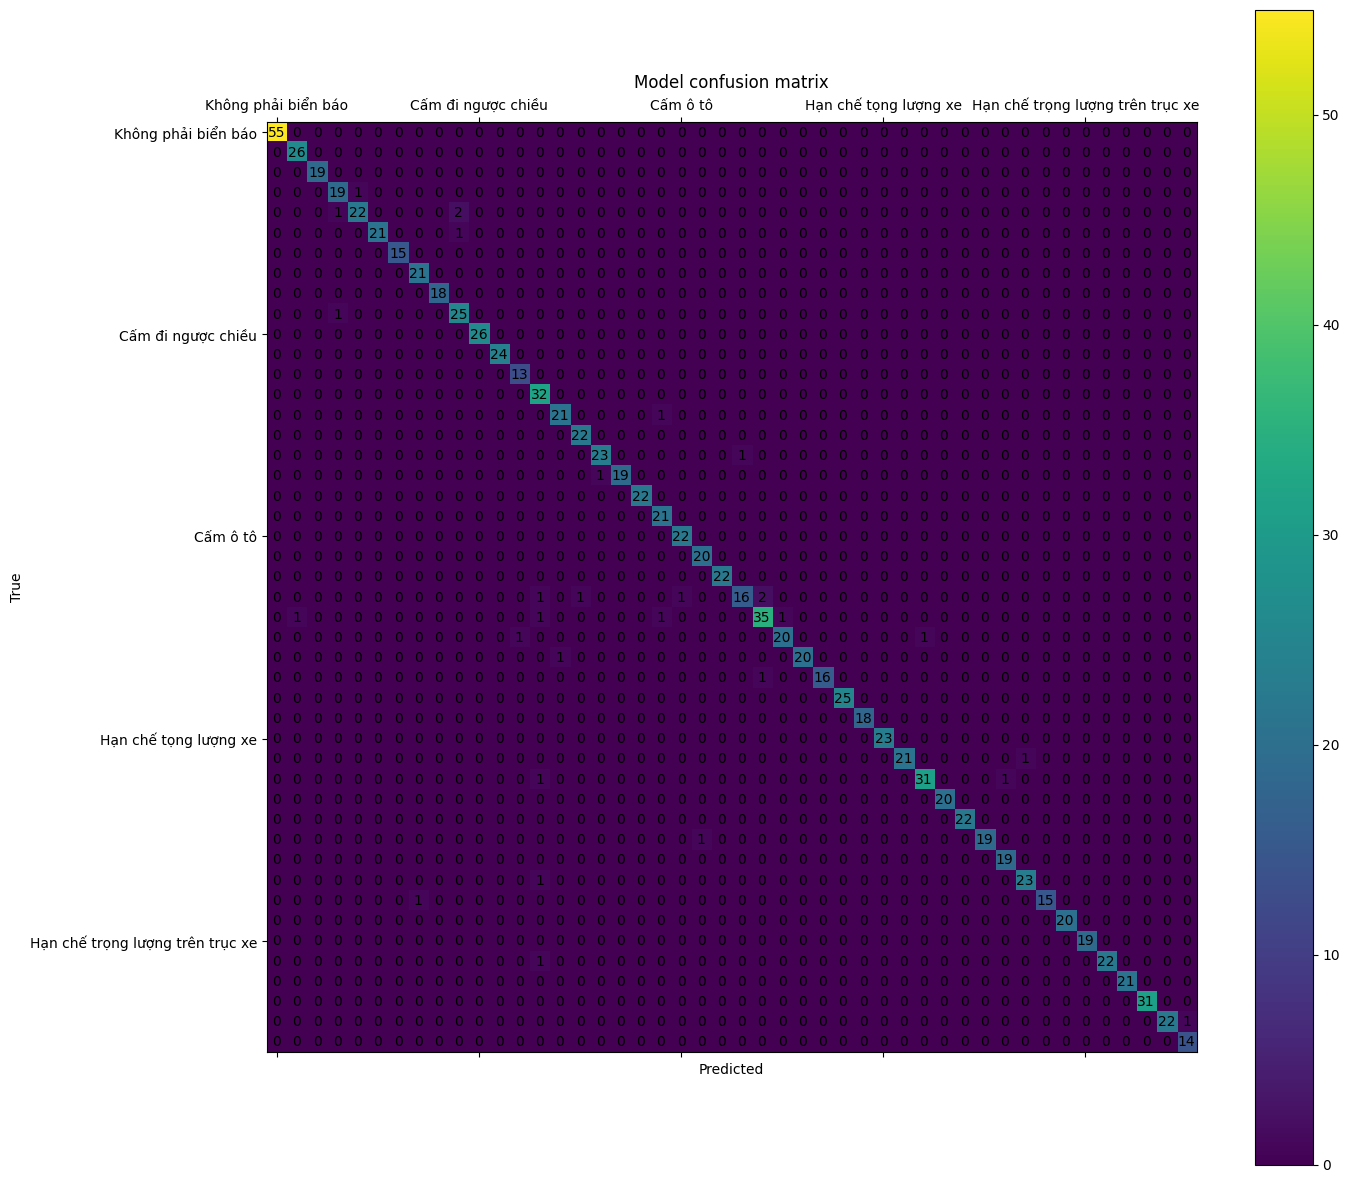

Accuracy: 97.14%
Precision: 97.25%
Recall: 97.14%
F1-score: 97.13%


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Dự đoán trên dữ liệu kiểm tra
pred = model.predict(testX)
predictions = np.argmax(pred, axis=1)

# Tính ma trận nhầm lẫn
cm = confusion_matrix(np.argmax(testY, axis=1), predictions)

# Vẽ biểu đồ ma trận nhầm lẫn
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + class_names)
ax.set_yticklabels([''] + class_names)

# Hiển thị số liệu trên từng ô của ma trận nhầm lẫn
for i in range(len(class_names)):
    for j in range(len(class_names)):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Tính độ chính xác
accuracy = accuracy_score(np.argmax(testY, axis=1), predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Tính precision
precision = precision_score(np.argmax(testY, axis=1), predictions, average='weighted')
print("Precision: %.2f%%" % (precision * 100))

# Tính recall
recall = recall_score(np.argmax(testY, axis=1), predictions, average='weighted')
print("Recall: %.2f%%" % (recall * 100))

# Tính f1-score
f1 = f1_score(np.argmax(testY, axis=1), predictions, average='weighted')
print("F1-score: %.2f%%" % (f1 * 100))



In [26]:
# Lưu mô hình
model.save("mobilenet_200.h5")

print("Mô hình đã được lưu thành công.")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Mô hình đã được lưu thành công.


1/1 [==============================] - 0s 81ms/step


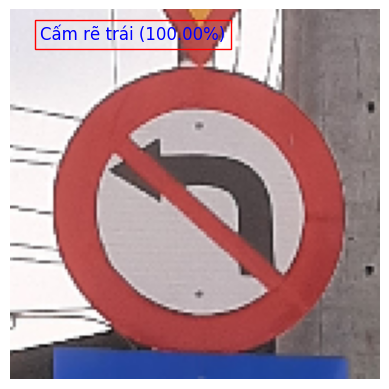

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

# Đường dẫn của hình ảnh bạn muốn dự đoán
img_path = 'a.jpg'

# Load và tiền xử lý hình ảnh
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

# Dự đoán
pred = model.predict(img_preprocessed)
predicted_class_index = np.argmax(pred[0])
predicted_class = class_names[predicted_class_index]
confidence = pred[0][predicted_class_index] * 100

# Hiển thị hình ảnh và kết quả dự đoán
plt.imshow(img)
plt.text(10, 10, f"{predicted_class} ({confidence:.2f}%)", color="blue", fontsize="large", bbox=dict(fill=False, edgecolor='red', linewidth=1))
plt.axis('off')
plt.show()
